# Análise Trabalho T9 

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import scipy.optimize as spo
np.set_printoptions(suppress=True, linewidth= 500)
from mpl_toolkits.axes_grid.inset_locator import inset_axes

### Formatação de gráfico 

Fica aqui o código genérico para fazer um gráfico maravilhoso 

##### Código para mudar 

In [58]:
# --- Formatação da figura ---
cm          = 1/2.54  # centimeters in inches
figsize     = ( 16*cm, 10*cm )
dpi         = 100
fontsize        = 10
# --- Formação dos pontos ---
marker_type = "o"
markersize  = 2.5
# --- Transparência da grid ---
alpha_grid = 0.5 
# --- Formatação barras de erro --- 
color_bars    = "k"
alpha_bars    = 0.5
thickness     = 1 
head_size     = 1 
head_thick    = 0.2

### Funções

In [59]:
def makeplot(data, dt_label, color_mk, *errors, bars=False,):
    data_x, data_y = data[0], data[1]
    fig , ax = plt.subplots( figsize = figsize, dpi = dpi  ) 
    ax.legend( fontsize = fontsize)
    ax.set_xlabel( xlabel , fontsize = fontsize )
    ax.set_ylabel( ylabel , fontsize = fontsize )
    plt.grid( alpha = alpha_grid )
    plot_data = ax.plot( data_x , data_y , marker_type ,
                    label      = dt_label , 
                    markersize = markersize )
    plot_data[0].set_color(color_mk )
    if bars:
        errorbar = plt.errorbar( data_x , data_y ,
                                yerr       = errors[0][1] ,
                                xerr       = errors[0][0] , 
                                ls         ='', color = color_bars, alpha = alpha_bars ,
                                elinewidth = thickness, capsize = head_size,capthick   = 0.2 )
    plt.legend( fontsize = fontsize )
    plt.tight_layout()
    return fig, ax

def add_points(data, dt_label, color_mk, figure,*errors, bars= False):
    data_x, data_y = data[0], data[1]
    fig, ax = figure[0], figure[1]
    plot_data = ax.plot( data_x , data_y , marker_type ,
                    label      = dt_label , 
                    markersize = markersize )
    plot_data[0].set_color(color_mk )
    if bars:
        errorbar = plt.errorbar( data_x , data_y ,
                                yerr       = errors[0][1] ,
                                xerr       = errors[0][0] , 
                                ls         ='', color = color_bars, alpha = alpha_bars ,
                                elinewidth = thickness, capsize = head_size,capthick   = 0.2 )
    ax.legend( fontsize = fontsize )

def get_coef( x , y , f_fit , coef0 ):
    result = spo.curve_fit( f_fit , x , y , p0 = coef0 )
    return result[ 0 ]

def add_fit( ax , x , coef , f_fit , label="Fit",linestyle = "k--"):
    y_fit     = f_fit( x ,*coef )
    linewidth = 1
    alpha     = 0.5 
    if label != False:
        ax.plot( x , y_fit , linestyle , label = label, linewidth = linewidth , alpha = alpha  )
        ax.legend(  fontsize = fontsize )
    else:
         ax.plot( x , y_fit , linestyle , linewidth = linewidth , alpha = alpha )
    
    return ax , y_fit

def add_residues( x , y_fit , y , color, in_fig , *args ):
    if not in_fig: 
        fig , ax = plt.subplots( figsize = (figsize))
        ax.set_xlabel( xlabel )
        ax.set_ylabel( "Resíduos" )
        ax.legend( fontsize = 15)
    
    else : 
        fig = args[ 0 ]
        ax = args[ 1 ]
        #loc= args[2]
        ax = inset_axes(ax, width="30%", height="30%")
    
    res       = y - y_fit
    
    global max_res
    global min_res
    max_res, min_res = max(max_res, np.max(res)), min(min_res,np.min(res))
    ax.scatter( x , res ,color = color, marker='.' )
    ax.grid(True)
    ax.set_title("Resíduos")
    if in_fig:
        return ax     
    return fig , ax  

colors=['blue', 'green', 'magenta', 'black', 'cyan', 'yellow']
linestyles = ['b--', 'g--', 'm--', 'k--', 'c--', 'y--']
max_res, min_res = 0, 0

# para guardar a imagem 
#fig.savefig( fig_name + ".png" )

In [60]:
freqs = np.transpose(np.genfromtxt("CSVs_T2/freqs.csv", delimiter = ",", skip_header=1))
H = 6.62607015e-34
W = 1.51 #ev
e = 1.602e-19

## Parte A

<div style="border:1px solid black;">
<span style="color:red; font-weight:bold;">Nota:</span> Vou optar por escolher o 1º ensaio na escala de 10nA para o LED 1 pelas razões da proximidade à célula fotoelétrica. Vou também desconsiderar as medições na escala 3nA para o LED 2 porque não são assim muito lineares e no laboratório vimos muita variação nas leituras do eletrómetro. Na conjugação final dos resultados vou eliminar o LED 6 e o 7 pelas razões da sensibilidade da célula e também pq não é possível colocá-los na mesma posição dos outros pq o suporte dos LEDs bate no suporte da célula.

In [61]:
xlabel = "V (V)"
ylabel = "I (nA)"
all_Vs = np.zeros(7)
all_u_Vs = np.zeros(7)

### Led 1

#### Dados

In [62]:
data_1 = []
erros_1 = []
data_1.append(np.transpose(np.genfromtxt("CSVs_T2/led1.1.csv", delimiter = ",", skip_header=1))[:2,])
erros_1.append(np.transpose(np.genfromtxt("CSVs_T2/led1.1.csv", delimiter = ",", skip_header=1))[2:,])

data_1.append(np.transpose(np.genfromtxt("CSVs_T2/led1.2.csv", delimiter = ",", skip_header=1))[:2,])
erros_1.append(np.transpose(np.genfromtxt("CSVs_T2/led1.2.csv", delimiter = ",", skip_header=1))[2:,])

data_1.append(np.transpose(np.genfromtxt("CSVs_T2/led1.3.csv", delimiter = ",", skip_header=1))[:2,])
erros_1.append(np.transpose(np.genfromtxt("CSVs_T2/led1.3.csv", delimiter = ",", skip_header=1))[2:,])

data_1.append(np.transpose(np.genfromtxt("CSVs_T2/led1.4.csv", delimiter = ",", skip_header=1))[:2,])
erros_1.append(np.transpose(np.genfromtxt("CSVs_T2/led1.4.csv", delimiter = ",", skip_header=1))[2:,])
labels = [ r"10$nA$, A",  r"10$nA$, B",  r"3$nA$, A",  r"3$nA$, B"]
title  = "LED 1"

#### Gráficos

No handles with labels found to put in legend.


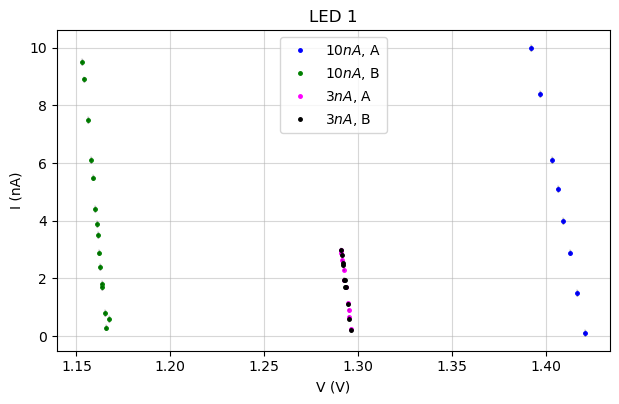

In [67]:
fig, ax = makeplot(data_1[0], labels[0], colors[0], erros_1[0], bars=True)
plt.title(title)

for i in range(1, len(data_1)):
    add_points(data_1[i], labels[i], colors[i], [fig,ax], erros_1[i], bars=True)
    
fig.savefig( "1" , dpi = 200 , facecolor = "w")

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


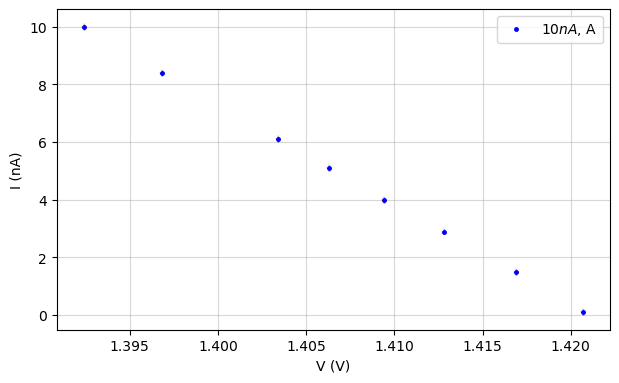

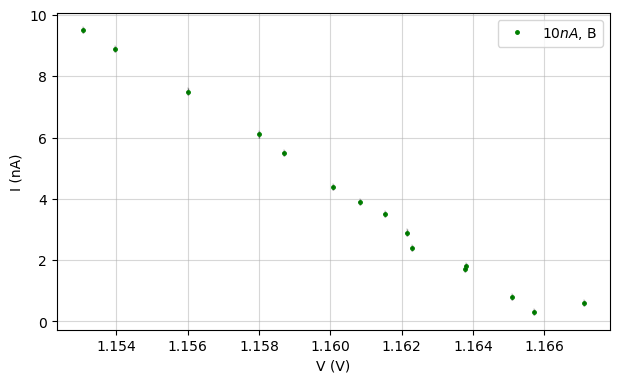

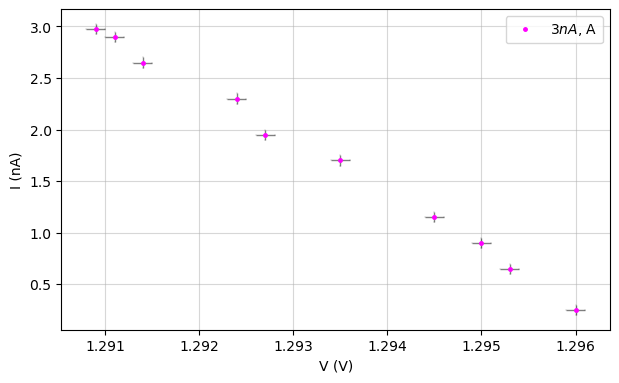

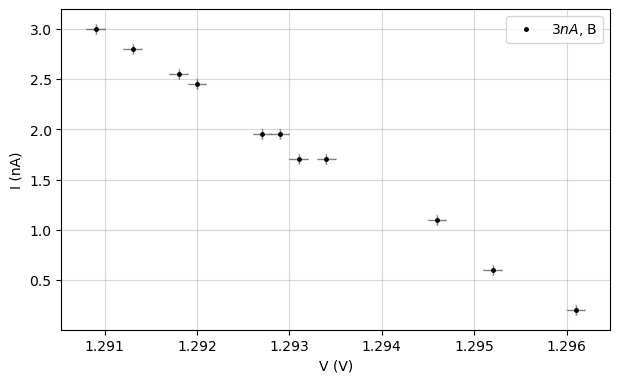

In [68]:
for i in range(0, len(data_1)):
    makeplot(data_1[i], labels[i], colors[i], erros_1[i], bars=True)

Optar por analisar apenas os pontos tirados na escala de 10nA a 1ª vez.Será por eventuamente ser o ensaio cuja distância à célula foi mais parecida com o resto dos ensaios para o LED? se calhar nos sets de medições no final da aula aproximei demasiado e de forma diferente dos outros LEDs.

No handles with labels found to put in legend.


Text(0.5, 1.0, 'LED 1')

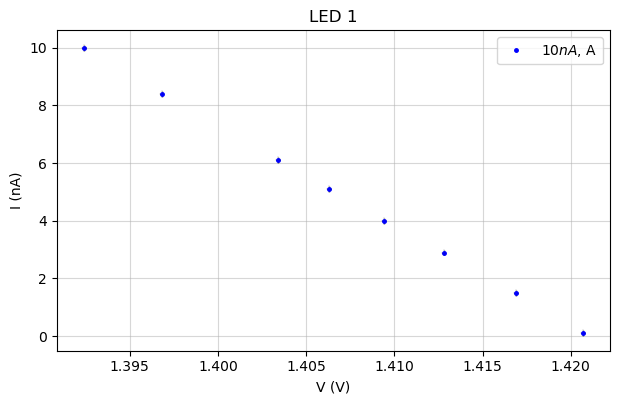

In [69]:
fig, ax = makeplot(data_1[0], labels[0], colors[0], erros_1[0], bars=True)
plt.title(title)

No handles with labels found to put in legend.


----- Ajuste para 10$nA$, A ----
m =  -347.3049662989553  +-  1.7194077119124118
b =  493.53780300875604  +-  2.4198369531245434
r^2 =  0.9998529641818831 

-- Resultados Experimentais-- 10$nA$, A ----
Pot. Paragem 1.421 	 +/-  0.0099
Pot. Paragem 1.421 	 +/-  0.7 % 

----- Ajuste para 10$nA$, B ----
m =  -700.0876369916949  +-  22.412218902149828
b =  816.6507293120828  +-  26.01633776775541
r^2 =  0.9868519827642188 

-- Resultados Experimentais-- 10$nA$, B ----
Pot. Paragem 1.166 	 +/-  0.053
Pot. Paragem 1.166 	 +/-  4.5 % 

----- Ajuste para 3$nA$, A ----
m =  -522.667225157882  +-  12.946514473198464
b =  677.6975689521854  +-  16.743483772346824
r^2 =  0.9951155162181695 

-- Resultados Experimentais-- 3$nA$, A ----
Pot. Paragem 1.297 	 +/-  0.045
Pot. Paragem 1.297 	 +/-  3.5 % 

----- Ajuste para 3$nA$, B ----
m =  -542.839781243667  +-  13.011717295938357
b =  703.7593680372654  +-  16.825345664023853
r^2 =  0.9948556738543645 

-- Resultados Experimentais-- 3$nA$, B ----
Pot

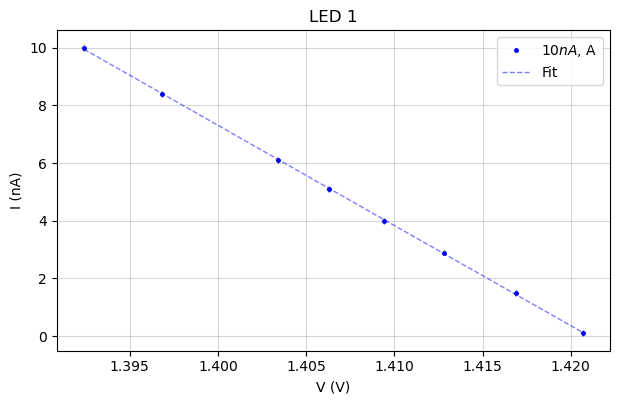

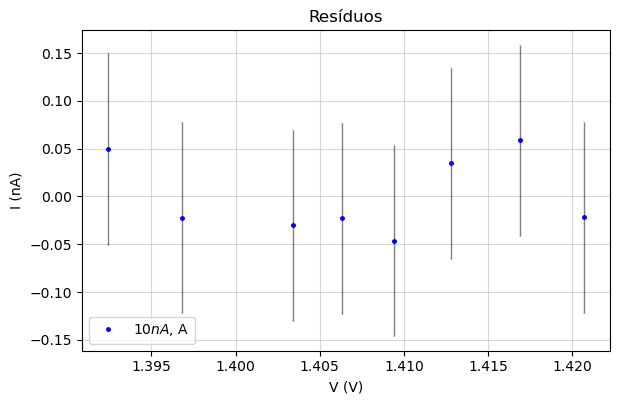

In [70]:
def linear(x,a,b):
    return a*x+b
V1 = []
u_V1 = []
first = True
for i in range(0, len(data_1)):
    results = sps.linregress( data_1[i][0], data_1[i][1]  )
    m , b  = results.slope , results.intercept
    um = results.stderr
    ub = results.intercept_stderr
    r2 = results.rvalue
    coefs = np.array([ m, b])
    print("----- Ajuste para", labels[i], "----")
    print( "m = " , m , " +- " , um )
    print( "b = " , b , " +- " , ub )
    print( "r^2 = " , r2 ** 2 , "\n")

    Vs = - b/m
    u_Vs = Vs * np.sqrt((ub/b)**2+(um/m)**2)
    u_Vs_perc = u_Vs / Vs *100
    print("-- Resultados Experimentais--", labels[i], "----")
    print("Pot. Paragem", "{:.4}".format(Vs), "\t +/- ", "{:.2}".format(u_Vs))
    print("Pot. Paragem", "{:.4}".format(Vs), "\t +/- ", "{:.2}".format(u_Vs_perc), "% \n")
    if i == 0: # ficar só com a primeira medição
        V1.append(Vs)
        u_V1.append(u_Vs)
        label = ""
        residuos = data_1[i][1]-linear(data_1[i][0], *coefs)
        if first:
            label = "Fit"
            figR, axR = makeplot([data_1[i][0],residuos], labels[i], colors[i], erros_1[i], bars=True)
            plt.title("Resíduos")
            first = False
        else:
            add_points([data_1[i][0],residuos], "", colors[i],[figR, axR], erros_1[i], bars=True)
        add_fit(ax, data_1[i][0], coefs, linear, label = label, linestyle = linestyles[i])
axR.legend()
print("\n -- Todos --")
print(V1)

fig.savefig( "1" , dpi = 200 , facecolor = "w")
figR.savefig( "2" , dpi = 200 , facecolor = "w")
fig

In [71]:
Vs1 = np.average(np.array(V1))
u_Vs1 = u_V1[0]
print("Valor final para Vs no LED 1 (em V): \t", Vs1, "  +/- ", u_Vs1)
all_Vs[0] = Vs1
all_u_Vs[0] = u_Vs1

Valor final para Vs no LED 1 (em V): 	 1.421050232215584   +/-  0.009901508656768875


### Led 2

#### Dados

In [72]:
data_2 = []
erros_2 = []
data_2.append(np.transpose(np.genfromtxt("CSVs_T2/led2.1.csv", delimiter = ",", skip_header=1))[:2,])
erros_2.append(np.transpose(np.genfromtxt("CSVs_T2/led2.1.csv", delimiter = ",", skip_header=1))[2:,])

data_2.append(np.transpose(np.genfromtxt("CSVs_T2/led2.2.csv", delimiter = ",", skip_header=1))[:2,])
erros_2.append(np.transpose(np.genfromtxt("CSVs_T2/led2.2.csv", delimiter = ",", skip_header=1))[2:,])

data_2.append(np.transpose(np.genfromtxt("CSVs_T2/led2.3.csv", delimiter = ",", skip_header=1))[:2,])
erros_2.append(np.transpose(np.genfromtxt("CSVs_T2/led2.3.csv", delimiter = ",", skip_header=1))[2:,])

data_2.append(np.transpose(np.genfromtxt("CSVs_T2/led2.4.csv", delimiter = ",", skip_header=1))[:2,])
erros_2.append(np.transpose(np.genfromtxt("CSVs_T2/led2.4.csv", delimiter = ",", skip_header=1))[2:,])

labels = [ r"10$nA$",  r"3$nA$",  r"1$nA$, A",  r"1$nA$, B"]
title = "LED 2"

No handles with labels found to put in legend.


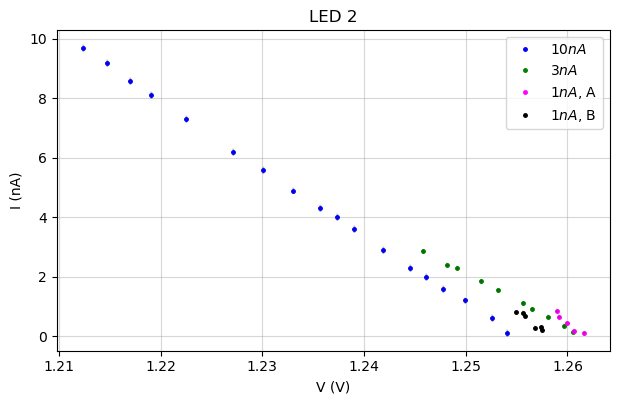

In [74]:
fig, ax = makeplot(data_2[0], labels[0], colors[0], erros_2[0], bars=True)
plt.title(title)

for i in range(1, len(data_1)):
    add_points(data_2[i], labels[i], colors[i], [fig,ax], erros_2[i], bars=True)
    
fig.savefig( "1" , dpi = 200 , facecolor = "w")


No handles with labels found to put in legend.


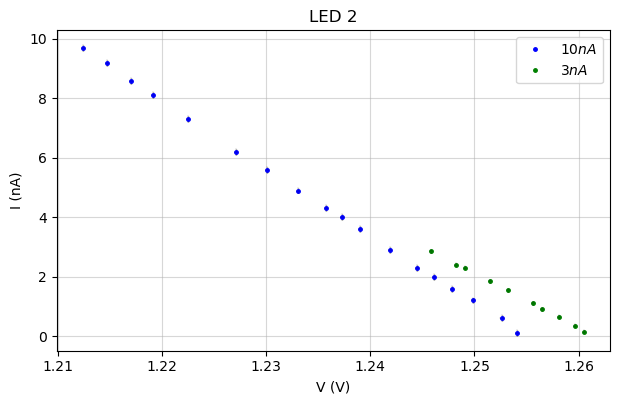

In [75]:
fig, ax = makeplot(data_2[0], labels[0], colors[0], erros_2[0], bars=True)
plt.title(title)  
add_points(data_2[1], labels[1], colors[1], [fig,ax], erros_2[1], bars=True)

No handles with labels found to put in legend.


----- Ajuste para 10$nA$ ----
m =  -227.25748465074503  +-  1.0279713032704698
b =  285.1640080481044  +-  1.269319005465558
r^2 =  0.9996727320922356 

-- Resultados Experimentais-- 10$nA$ ----
Pot. Paragem 1.255 	 +/-  0.008
Pot. Paragem 1.255 	 +/-  0.63 % 

----- Ajuste para 3$nA$ ----
m =  -182.22210718846037  +-  1.8827377617033825
b =  229.8837224350354  +-  2.360631665075304
r^2 =  0.9991467097423307 

-- Resultados Experimentais-- 3$nA$ ----
Pot. Paragem 1.262 	 +/-  0.018
Pot. Paragem 1.262 	 +/-  1.5 % 


 -- Todos --
[1.254805792145203, 1.2615578097627953]


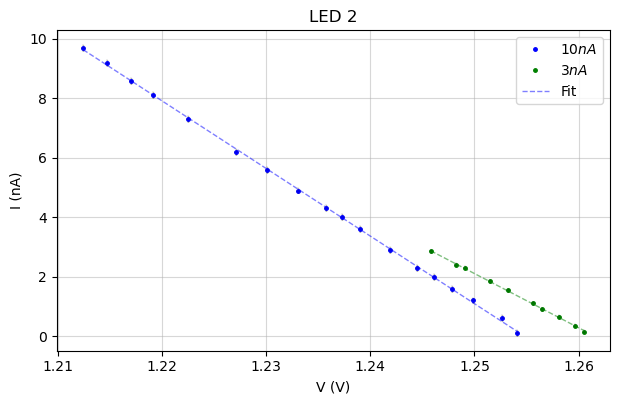

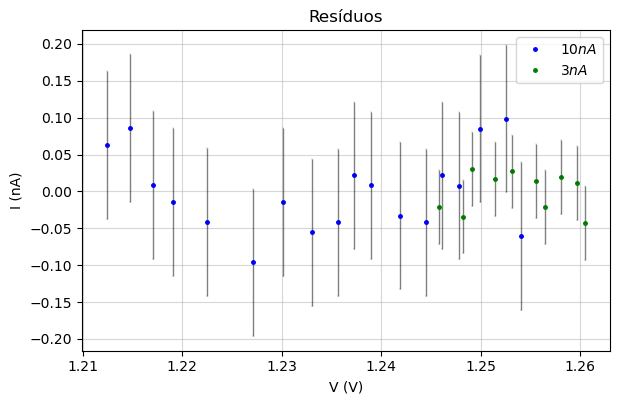

In [76]:
V2 = []
u_V2 = []
first = True
for i in range(0,2):
    results = sps.linregress( data_2[i][0], data_2[i][1]  )
    m , b  = results.slope , results.intercept
    um = results.stderr
    ub = results.intercept_stderr
    r2 = results.rvalue
    coefs = np.array([ m, b])
    print("----- Ajuste para", labels[i], "----")
    print( "m = " , m , " +- " , um )
    print( "b = " , b , " +- " , ub )
    print( "r^2 = " , r2 ** 2 , "\n")

    Vs = - b/m
    u_Vs = Vs * np.sqrt((ub/b)**2+(um/m)**2)
    u_Vs_perc = u_Vs / Vs *100
    print("-- Resultados Experimentais--", labels[i], "----")
    print("Pot. Paragem", "{:.4}".format(Vs), "\t +/- ", "{:.2}".format(u_Vs))
    print("Pot. Paragem", "{:.4}".format(Vs), "\t +/- ", "{:.2}".format(u_Vs_perc), "% \n")
    V2.append(Vs)
    u_V2.append(u_Vs)
    label = ""
    residuos = data_2[i][1]-linear(data_2[i][0], *coefs)
    if first:
        label = "Fit"      
        figR, axR = makeplot([data_2[i][0],residuos], labels[i], colors[i], erros_2[i], bars=True)
        plt.title("Resíduos")
        first = False
    else:
        add_points([data_2[i][0],residuos], labels[i], colors[i],[figR, axR], erros_2[i], bars=True)
    add_fit(ax, data_2[i][0], coefs, linear, label = label, linestyle = linestyles[i])
    
axR.legend()
print("\n -- Todos --")
print(V2)
fig.savefig( "1" , dpi = 200 , facecolor = "w")
figR.savefig( "2" , dpi = 200 , facecolor = "w")

fig

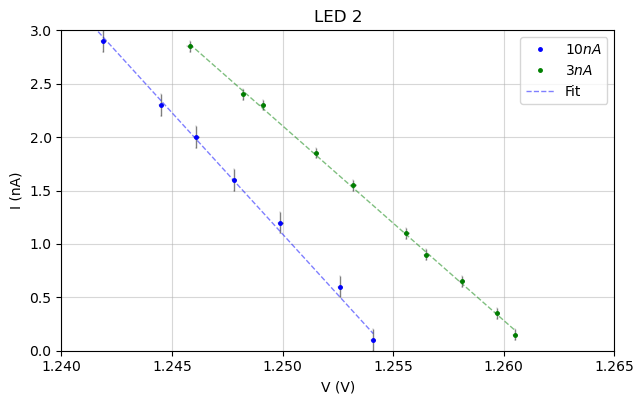

In [77]:
ax.set_xlim(1.24,1.265)
ax.set_ylim(0,3)
fig

In [78]:
V2 = np.array(V2)
u_V2 = np.array(u_V2)
Vs2 = np.average(V2)
u_Vs2 = Vs2 * np.sqrt(np.sum((u_V2/V2)**2))
print("Valor final para Vs no LED 2 (em V): \t", Vs2, "\t +/- ", u_Vs2)
all_Vs[1] = Vs2
all_u_Vs[1] = u_Vs2

Valor final para Vs no LED 2 (em V): 	 1.2581818009539991 	 +/-  0.019991824102770468


### LED 3

In [93]:
data = np.transpose(np.genfromtxt("CSVs_T2/led3.csv", delimiter = ",", skip_header=1))[:2,]
erros = np.transpose(np.genfromtxt("CSVs_T2/led3.csv", delimiter = ",", skip_header=1))[2:,]
labels = r"10$nA$"
title  = "LED 3"

cut = 4
duvs_3 = np.zeros([2, cut])
duvs_3[0] = data[0][:cut]
duvs_3[1] = data[1][:cut]
data_3 = np.zeros([2, data.shape[1] - cut])
data_3[0] = data[0][cut:]
data_3[1] = data[1][cut:]
erros_3 = np.zeros([2, data.shape[1] - cut])
erros_3[0] = erros[0][cut:]
erros_3[1] = erros[1][cut:]

No handles with labels found to put in legend.


Text(0.5, 1.0, 'LED 3')

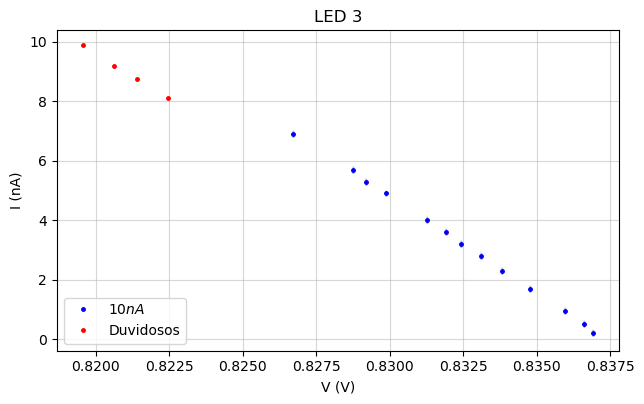

In [94]:
fig, ax = makeplot(data_3, labels, colors[0], erros_3, bars=True)
add_points(duvs_3, "Duvidosos", "red", [fig,ax], bars = False)
plt.legend(loc="lower left")
plt.title(title)

m =  -653.6825031970974  +-  4.307520994624521
b =  547.3694848670798  +-  3.5856679188052123
r^2 =  0.9995225736590407

 -- Resultados Experimentais-- 10$nA$ ----
Pot. Paragem 0.8374 	 +/-  0.0078
Pot. Paragem 0.8374 	 +/-  0.93 % 



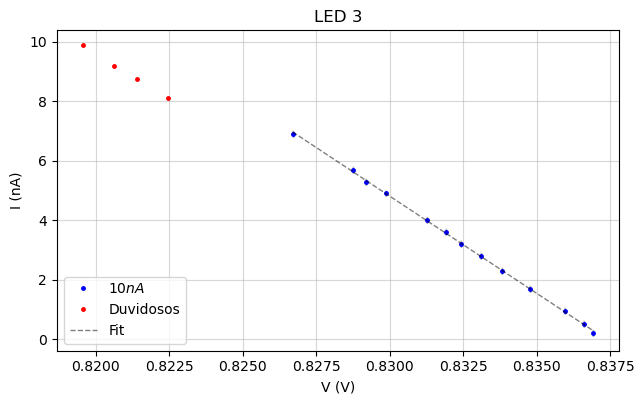

In [95]:
results = sps.linregress( data_3[0] , data_3[1]  )
m , b  = results.slope , results.intercept
um = results.stderr
ub = results.intercept_stderr
r2 = results.rvalue
coefs = np.array([ m , b])
print( "m = " , m , " +- " , um )
print( "b = " , b , " +- " , ub )
print( "r^2 = " , r2 ** 2   )

Vs = - b/m
u_Vs = Vs * np.sqrt((ub/b)**2+(um/m)**2)
u_Vs_perc = u_Vs / Vs *100
print("\n -- Resultados Experimentais--", labels, "----")
print("Pot. Paragem", "{:.4}".format(Vs), "\t +/- ", "{:.2}".format(u_Vs))
print("Pot. Paragem", "{:.4}".format(Vs), "\t +/- ", "{:.2}".format(u_Vs_perc), "% \n")
add_fit(ax, data_3[0], coefs, linear, label = "Fit", linestyle = "k--")
Vs3 = Vs
u_Vs3 = u_Vs
all_Vs[2] = Vs3
ax.legend(loc="lower left")

all_u_Vs[2] = u_Vs3
fig

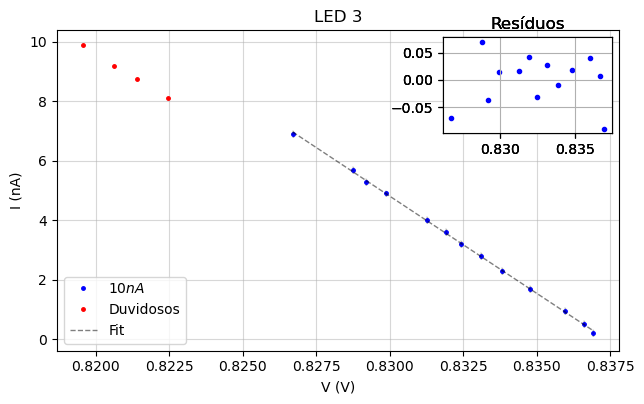

In [98]:
title="Resíduos"
add_residues(data_3[0],linear(data_3[0], *coefs), data_3[1], colors[0], True, fig, ax)

ax.legend( loc = "lower left")
fig.savefig( "1" , dpi = 200 , facecolor = "w")
fig

### LED 4

In [99]:
data = np.transpose(np.genfromtxt("CSVs_T2/led4.csv", delimiter = ",", skip_header=1))
labels = r"10$nA$"
title  = "LED 4"

cut = 7
duvs_4 = np.zeros([2, cut])
duvs_4[0] = data[0][:cut]
duvs_4[1] = data[1][:cut]
data_4 = np.zeros([2, data.shape[1] - cut])
data_4[0] = data[0][cut:]
data_4[1] = data[1][cut:]

No handles with labels found to put in legend.


Text(0.5, 1.0, 'LED 4')

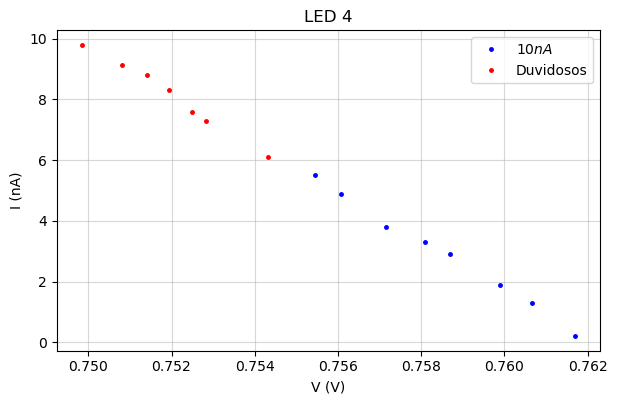

In [100]:
fig, ax = makeplot(data_4, labels, colors[0], bars=False)
add_points(duvs_4, "Duvidosos", "red", [fig,ax], bars = False)


plt.title(title)

m =  -811.0404471448585  +-  23.481733577664052
b =  618.1197789431661  +-  17.810109663934416
r^2 =  0.9949956495175746

 -- Resultados Experimentais-- 10$nA$ ----
Pot. Paragem 0.7621 	 +/-  0.031
Pot. Paragem 0.7621 	 +/-  4.1 % 



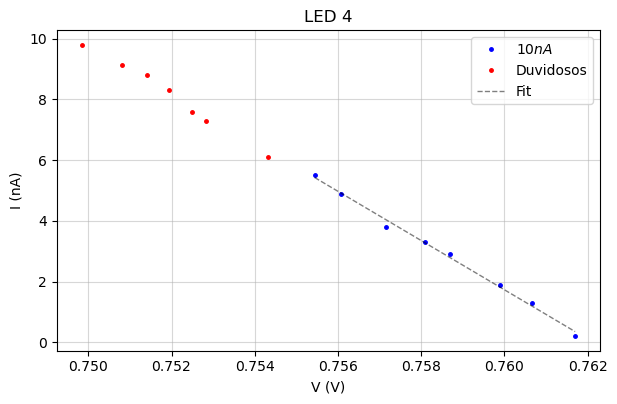

In [101]:
results = sps.linregress( data_4[0] , data_4[1]  )
m , b  = results.slope , results.intercept
um = results.stderr
ub = results.intercept_stderr
r2 = results.rvalue
coefs = np.array([ m , b])
print( "m = " , m , " +- " , um )
print( "b = " , b , " +- " , ub )
print( "r^2 = " , r2 ** 2   )

Vs = - b/m
u_Vs = Vs * np.sqrt((ub/b)**2+(um/m)**2)
u_Vs_perc = u_Vs / Vs *100
print("\n -- Resultados Experimentais--", labels, "----")
print("Pot. Paragem", "{:.4}".format(Vs), "\t +/- ", "{:.2}".format(u_Vs))
print("Pot. Paragem", "{:.4}".format(Vs), "\t +/- ", "{:.2}".format(u_Vs_perc), "% \n")
add_fit(ax, data_4[0], coefs, linear, label = "Fit", linestyle = "k--")
Vs4 = Vs
u_Vs4 = u_Vs
all_Vs[3] = Vs4
all_u_Vs[3] = u_Vs4
fig

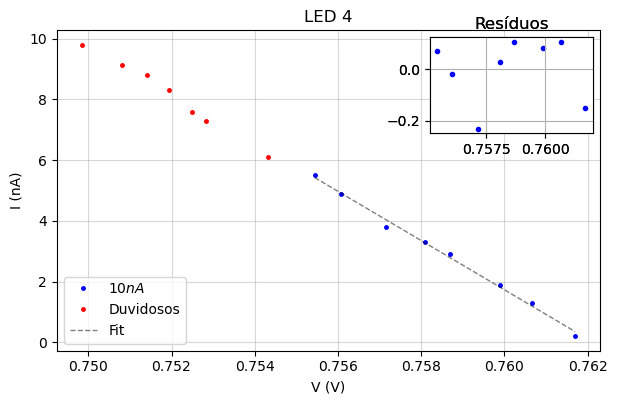

In [103]:
title="Resíduos"
ax.legend( loc = "lower left")
add_residues(data_4[0],linear(data_4[0], *coefs), data_4[1], colors[0], True, fig, ax)
fig.savefig( "1" , dpi = 200 , facecolor = "w")

fig

### LED 5

In [104]:
data_5 = []
erros_5 = []
data_5.append(np.transpose(np.genfromtxt("CSVs_T2/led5.1.csv", delimiter = ",", skip_header=1))[:2,])
erros_5.append(np.transpose(np.genfromtxt("CSVs_T2/led5.1.csv", delimiter = ",", skip_header=1))[2:,])

data_5.append(np.transpose(np.genfromtxt("CSVs_T2/led5.2.csv", delimiter = ",", skip_header=1))[:2,])
erros_5.append(np.transpose(np.genfromtxt("CSVs_T2/led5.2.csv", delimiter = ",", skip_header=1))[2:,])
labels = [ r"10$nA$",  r"3$nA$"]
title  = "LED 5"

No handles with labels found to put in legend.


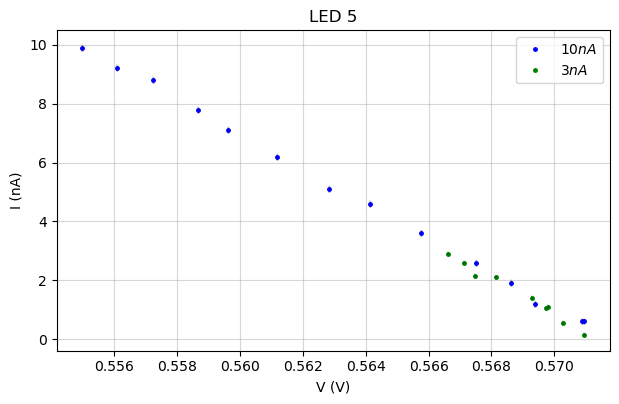

In [108]:
fig, ax = makeplot(data_5[0], labels[0], colors[0], erros_5[0],bars=True)
plt.title(title)

for i in range(1, len(data_5)):
    add_points(data_5[i], labels[i], colors[i], [fig,ax], erros_5[i], bars=True)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


----- Ajuste para 10$nA$ ----
m =  -589.4960919494654  +-  5.8677618680748775
b =  337.0767452690249  +-  3.3061644789794395
r^2 =  0.9988124598606383 

-- Resultados Experimentais-- 10$nA$ ----
Pot. Paragem 0.5718 	 +/-  0.008
Pot. Paragem 0.5718 	 +/-  1.4 % 

----- Ajuste para 3$nA$ ----
m =  -607.461875063951  +-  31.498587402061048
b =  347.0967440329049  +-  17.91732893638934
r^2 =  0.9815267092854897 

-- Resultados Experimentais-- 3$nA$ ----
Pot. Paragem 0.5714 	 +/-  0.042
Pot. Paragem 0.5714 	 +/-  7.3 % 


 -- Todos --
[0.571804885345908, 0.5713885237593949]


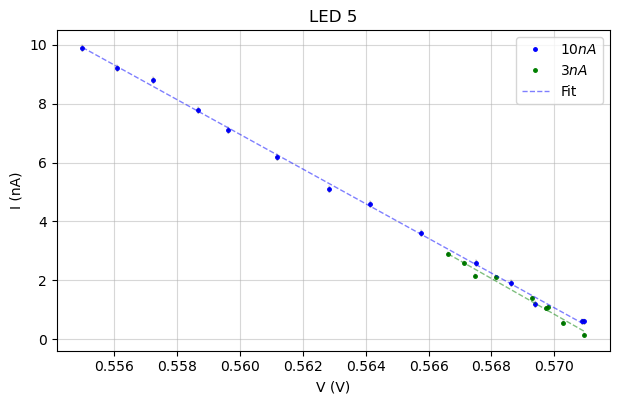

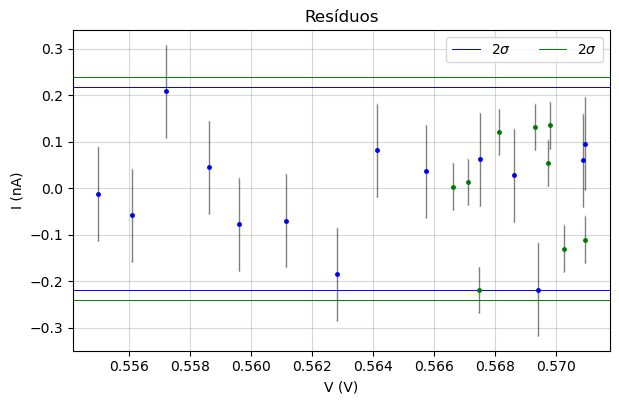

In [109]:
V5 = []
u_V5 = []
for i in range(0, len(data_5)):
    results = sps.linregress( data_5[i][0], data_5[i][1]  )
    m , b  = results.slope , results.intercept
    um = results.stderr
    ub = results.intercept_stderr
    r2 = results.rvalue
    coefs = np.array([ m, b])
    print("----- Ajuste para", labels[i], "----")
    print( "m = " , m , " +- " , um )
    print( "b = " , b , " +- " , ub )
    print( "r^2 = " , r2 ** 2 , "\n")

    Vs = - b/m
    u_Vs = Vs * np.sqrt((ub/b)**2+(um/m)**2)
    u_Vs_perc = u_Vs / Vs *100
    print("-- Resultados Experimentais--", labels[i], "----")
    print("Pot. Paragem", "{:.4}".format(Vs), "\t +/- ", "{:.2}".format(u_Vs))
    print("Pot. Paragem", "{:.4}".format(Vs), "\t +/- ", "{:.2}".format(u_Vs_perc), "% \n")
    V5.append(Vs)
    u_V5.append(u_Vs)
    label = ""
    
    residuos = data_5[i][1]-linear(data_5[i][0], *coefs)
    if i == 0:
        label = "Fit"
        figR, axR = makeplot([data_5[i][0],residuos], "", colors[i], erros_5[i], bars = True)
        plt.title("Resíduos")
    else:
        add_points([data_5[i][0],residuos], "", colors[i],[figR, axR],erros_5[i], bars = True)
    add_fit(ax, data_5[i][0], coefs, linear, label = label, linestyle = linestyles[i])
    axR.axhline(2 * np.std(residuos), color=colors[i], linestyle='solid', linewidth=0.7,  label =r'$2 \sigma$')
    axR.axhline(-2 * np.std(residuos), color=colors[i], linestyle='solid', linewidth=0.7)
axR.legend(ncol=2)
    
print("\n -- Todos --")
print(V5)
figR.savefig( "2" , dpi = 200 , facecolor = "w")
fig.savefig( "1" , dpi = 200 , facecolor = "w")

fig

In [110]:
V5 = np.array(V5)
u_V5 = np.array(u_V5)
Vs5 = np.average(V5)
u_Vs5 = Vs5 * np.sqrt(np.sum((u_V5/V5)**2))
print("Valor final para Vs no LED 2 (em V): \t", Vs5, "\t +/- ", u_Vs5)
all_Vs[4] = Vs5
all_u_Vs[4] = u_Vs5

Valor final para Vs no LED 2 (em V): 	 0.5715967045526514 	 +/-  0.04257791666331369


### LED 6

In [123]:
data = np.transpose(np.genfromtxt("CSVs_T2/led6.csv", delimiter = ",", skip_header=1))
labels = r"3$nA$"
title  = "LED 6"

cut = 13
duvs_6 = np.zeros([2, cut])
duvs_6[0] = data[0][:cut]
duvs_6[1] = data[1][:cut]
data_6 = np.zeros([2, data.shape[1] - cut])
data_6[0] = data[0][cut:]
data_6[1] = data[1][cut:]

No handles with labels found to put in legend.


Text(0.5, 1.0, 'LED 6')

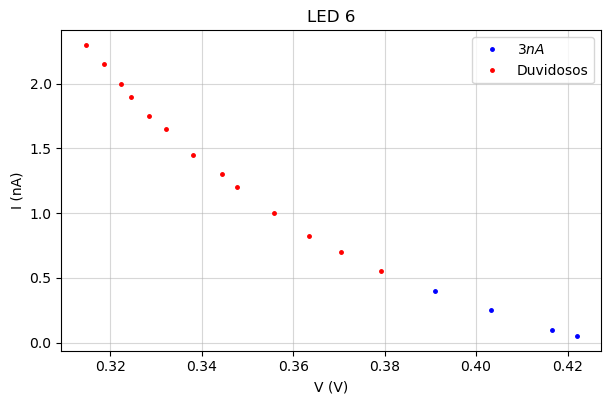

In [127]:
fig, ax = makeplot(data_6, labels, colors[0], bars=False)
add_points(duvs_6, "Duvidosos", "red", [fig,ax], bars = False)
plt.title(title)

m =  -11.372403600550117  +-  0.3197725341478938
b =  4.842499459834571  +-  0.13059582249094354
r^2 =  0.9984212201042973

 -- Resultados Experimentais-- 3$nA$ ----
Pot. Paragem 0.4258 	 +/-  0.017
Pot. Paragem 0.4258 	 +/-  3.9 % 



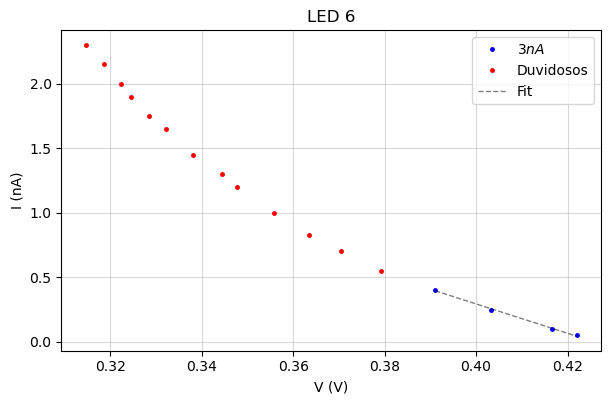

In [128]:
results = sps.linregress( data_6[0] , data_6[1]  )
m , b  = results.slope , results.intercept
um = results.stderr
ub = results.intercept_stderr
r2 = results.rvalue
coefs = np.array([ m , b])
print( "m = " , m , " +- " , um )
print( "b = " , b , " +- " , ub )
print( "r^2 = " , r2 ** 2   )

Vs = - b/m
u_Vs = Vs * np.sqrt((ub/b)**2+(um/m)**2)
u_Vs_perc = u_Vs / Vs *100
print("\n -- Resultados Experimentais--", labels, "----")
print("Pot. Paragem", "{:.4}".format(Vs), "\t +/- ", "{:.2}".format(u_Vs))
print("Pot. Paragem", "{:.4}".format(Vs), "\t +/- ", "{:.2}".format(u_Vs_perc), "% \n")
add_fit(ax, data_6[0], coefs, linear, label = "Fit", linestyle = "k--")
Vs6 = Vs
u_Vs6 = u_Vs
all_Vs[5] = Vs6
all_u_Vs[5] = u_Vs6
fig

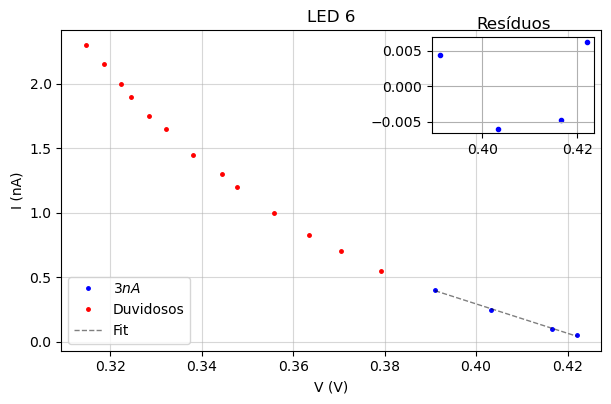

In [129]:
title="Resíduos"
add_residues(data_6[0],linear(data_6[0], *coefs), data_6[1], colors[0], True, fig, ax)
ax.legend( loc = "lower left")
fig.savefig( "1" , dpi = 200 , facecolor = "w")

fig

### LED 7

In [130]:
data = np.transpose(np.genfromtxt("CSVs_T2/led7.csv", delimiter = ",", skip_header=1))
labels = r"1$nA$"
title  = "LED 7"

cut = 5
duvs_7 = np.zeros([2, cut])
duvs_7[0] = data[0][:cut]
duvs_7[1] = data[1][:cut]
data_7 = np.zeros([2, data.shape[1] - cut])
data_7[0] = data[0][cut:]
data_7[1] = data[1][cut:]

No handles with labels found to put in legend.


Text(0.5, 1.0, 'LED 7')

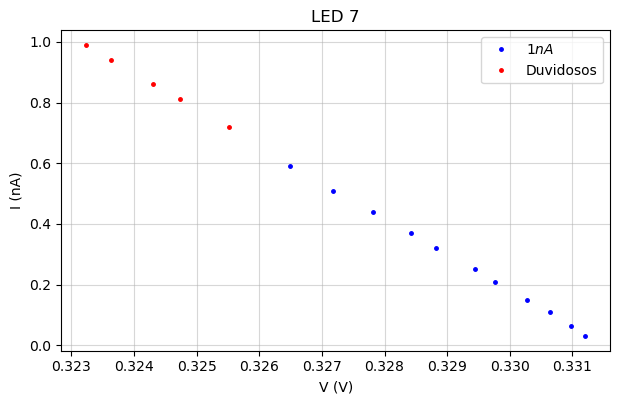

In [131]:
fig, ax = makeplot(data_7, labels, colors[0], bars=False)
add_points(duvs_7, "Duvidosos", "red", [fig,ax], bars = False)
plt.title(title)

m =  -117.80370866478727  +-  0.8743443840366643
b =  39.05587137721527  +-  0.2878228594316868
r^2 =  0.9995044649574651

 -- Resultados Experimentais-- 1$nA$ ----
Pot. Paragem 0.3315 	 +/-  0.0035
Pot. Paragem 0.3315 	 +/-  1.0 % 



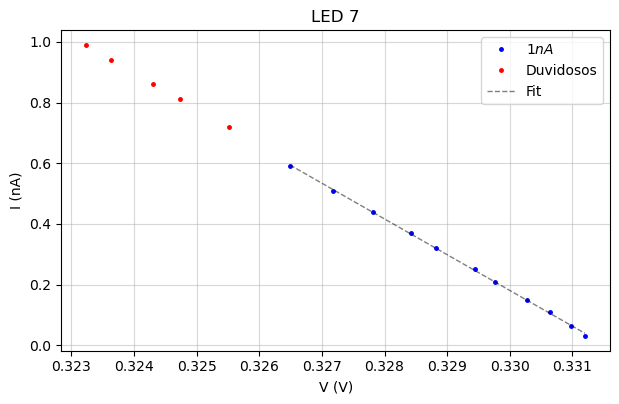

In [132]:
results = sps.linregress( data_7[0] , data_7[1]  )
m , b  = results.slope , results.intercept
um = results.stderr
ub = results.intercept_stderr
r2 = results.rvalue
coefs = np.array([ m , b])
print( "m = " , m , " +- " , um )
print( "b = " , b , " +- " , ub )
print( "r^2 = " , r2 ** 2   )

Vs = - b/m
u_Vs = Vs * np.sqrt((ub/b)**2+(um/m)**2)
u_Vs_perc = u_Vs / Vs *100
print("\n -- Resultados Experimentais--", labels, "----")
print("Pot. Paragem", "{:.4}".format(Vs), "\t +/- ", "{:.2}".format(u_Vs))
print("Pot. Paragem", "{:.4}".format(Vs), "\t +/- ", "{:.2}".format(u_Vs_perc), "% \n")
add_fit(ax, data_7[0], coefs, linear, label = "Fit", linestyle = "k--")
Vs7 = Vs
u_Vs7 = u_Vs
all_Vs[6] = Vs7
all_u_Vs[6] = u_Vs7
fig

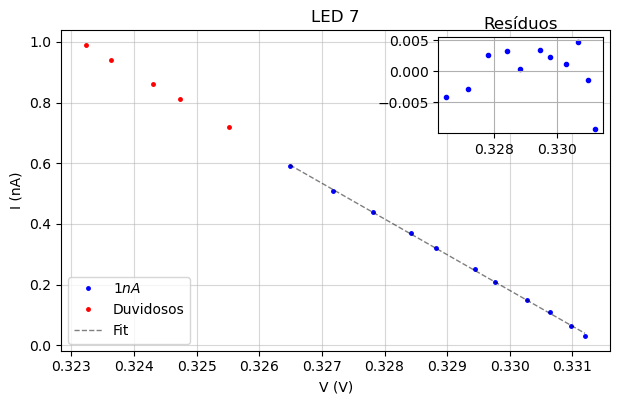

In [133]:
title="Resíduos"
add_residues(data_7[0],linear(data_7[0], *coefs), data_7[1], colors[0], True, fig, ax)
ax.legend( loc = "lower left")
fig.savefig( "1" , dpi = 200 , facecolor = "w")

fig

### Resultados finais

In [141]:
print( (1.7 - 1.59)/(1.59)*100 )

6.918238993710683


No handles with labels found to put in legend.


[1.42105023 1.2581818  0.83736291 0.76213188 0.5715967  0.42581143 0.33153346]
[0.00990151 0.01999182 0.0077805  0.03113067 0.04257792 0.01658998 0.0034676 ]


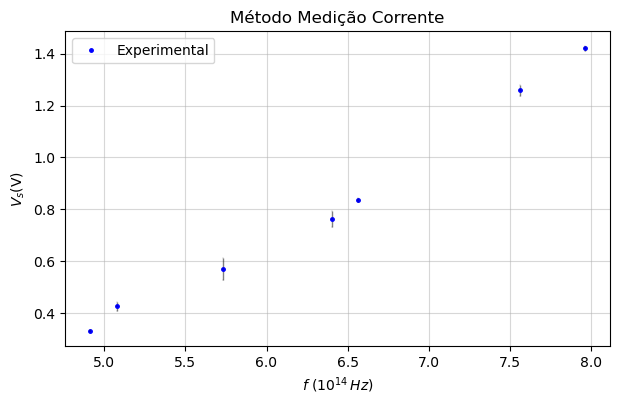

In [142]:
xlabel = r"$f \,\, (10^{14} \, Hz)$"
ylabel =  r"$V_s$(V)"
data = np.zeros([2, freqs.shape[0]])
data[0]=freqs
data[1] = all_Vs
fig, ax = makeplot(data, "Experimental", colors[0], [all_u_Vs*0.,all_u_Vs ], bars=True)
plt.title("Método Medição Corrente")
print(all_Vs)
print(all_u_Vs)

m =  0.34915551469923267  +-  0.01866538626099756
b =  -1.4040709832569536  +-  0.11959727024249386
r^2 =  0.9859121610085101

 ----- Resultados Experimentais-----
C. de Planck em Js: 5.6e-34 	 +/-  3.0e-35
C. de Planck em Js: 5.6e-34 	 +/-  5.3 %
Erro percentual em relação ao teórico: 15.583879752892333 %


F. Trabalho (eV): 1.4 	 +/-  -0.12
F. Trabalho (eV): 1.4 	 +/-  -8.52 %
Erro percentual em relação ao teórico: 7.015166671724931 %


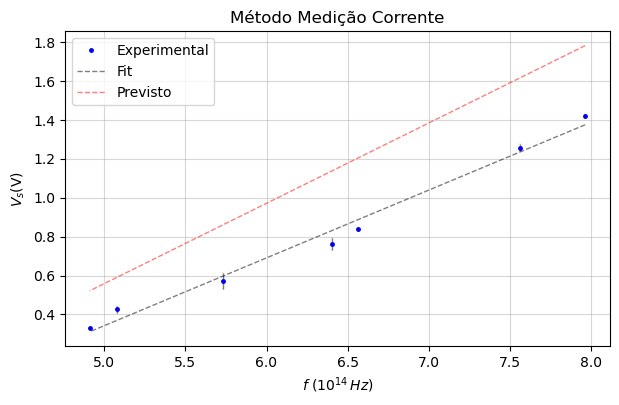

In [143]:
results = sps.linregress( data[0] , data[1]  )
m , b  = results.slope , results.intercept
um = results.stderr
ub = results.intercept_stderr
r2 = results.rvalue
coefs = np.array([ m , b])
print( "m = " , m , " +- " , um )
print( "b = " , b , " +- " , ub )
print( "r^2 = " , r2 ** 2   )

h = m * e *10**-14
u_h = um/m * h
u_h_perc = u_h / h *100
erro_h = np.abs(h-H)/H *100

w = - b
u_w = w * np.abs(ub)/b
u_w_perc = u_w/ w *100
erro_w = np.abs(w-W)/W *100

print("\n ----- Resultados Experimentais-----")
print("C. de Planck em Js:", "{:.1e}".format(h), "\t +/- ", "{:.1e}".format(u_h))
print("C. de Planck em Js:", "{:.1e}".format(h), "\t +/- ", "{:.2}".format(u_h_perc), "%")
print("Erro percentual em relação ao teórico:", "{:2}".format(erro_h), "%")
print("\n")
print("F. Trabalho (eV):", "{:.3}".format(w), "\t +/- ", "{:.2}".format(u_w))
print("F. Trabalho (eV):", "{:.3}".format(w), "\t +/- ", "{:.3}".format(u_w_perc), "%")
print("Erro percentual em relação ao teórico:", "{:2}".format(erro_w), "%")


add_fit(ax, data[0], coefs, linear, label = "Fit", linestyle = "k--")
add_fit(ax, data[0], [H/e*10**14, -W], linear, label = "Previsto", linestyle = "r--")
fig

No handles with labels found to put in legend.


Média dos resíduos: -1.1102230246251565e-16 	 Resíduo máximo 0.07048736612001272 	 Desvio padrão: 0.045087452250288276


Text(0.5, 1.0, 'Resíduos')

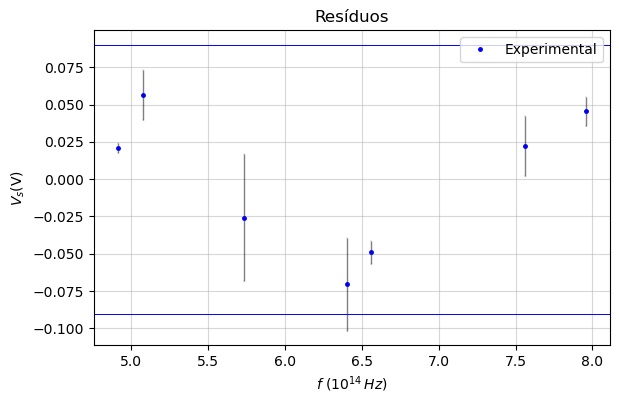

In [144]:
title="Resíduos"
residuos = data[1]-linear(data[0], *coefs)

fig, ax = makeplot([data[0], residuos], "Experimental", colors[0], [all_u_Vs*0.,all_u_Vs ], bars=True)

print( "Média dos resíduos:",np.average(residuos), "\t Resíduo máximo",np.max(np.abs(residuos)), "\t Desvio padrão:", np.std(residuos))

ax.axhline(2 * np.std(residuos), color=colors[0], linestyle='solid', linewidth=0.7,  label =r'$2 \sigma$')
ax.axhline(-2 * np.std(residuos), color=colors[0], linestyle='solid', linewidth=0.7)
plt.title(title)

#### Duvidosos

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Método Medição Corrente')

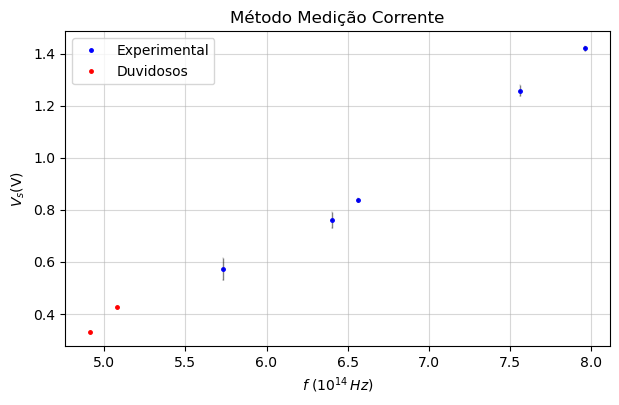

In [145]:
cut = 2
duvs = np.zeros([2, cut])
duvs[0] = data[0][-cut:]
duvs[1] = data[1][-cut:]
data = np.zeros([2, freqs[:-cut].shape[0]])
data[0]=freqs[:-cut]
data[1] = all_Vs[:-cut]
fig, ax = makeplot(data, "Experimental", colors[0], [all_u_Vs[:-cut]*0.,all_u_Vs[:-cut] ], bars=True)
add_points(duvs, "Duvidosos", "red", [fig,ax], bars = False)
plt.title("Método Medição Corrente")

m =  0.3920082155266134  +-  0.018596165296786933
b =  -1.7128395214196988  +-  0.12815780475934316
r^2 =  0.9932941230713174

 ----- Resultados Experimentais-----
C. de Planck em Js: 6.3e-34 	 +/-  3.0e-35
C. de Planck em Js: 6.3e-34 	 +/-  4.7 %
Erro percentual em relação ao teórico: 5.223285136268179 %


F. Trabalho (eV): 1.71 	 +/-  -0.13
F. Trabalho (eV): 1.71 	 +/-  -7.48 %
Erro percentual em relação ao teórico: 13.433080888721772 %


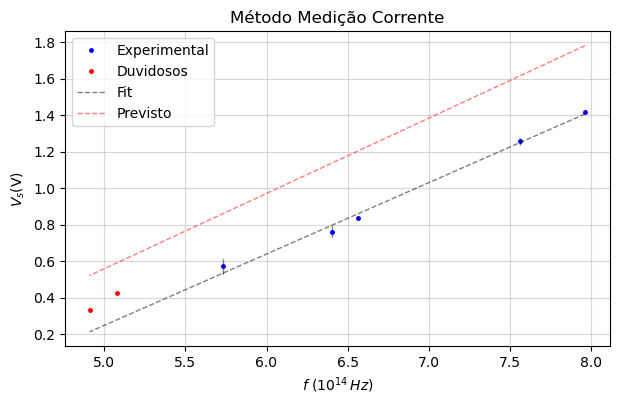

In [146]:
results = sps.linregress( data[0] , data[1]  )
m , b  = results.slope , results.intercept
um = results.stderr
ub = results.intercept_stderr
r2 = results.rvalue
coefs = np.array([ m , b])
print( "m = " , m , " +- " , um )
print( "b = " , b , " +- " , ub )
print( "r^2 = " , r2 ** 2   )

h = m * e *10**-14
u_h = um/m * h
u_h_perc = u_h / h *100
erro_h = np.abs(h-H)/H *100

w = - b
u_w = w * np.abs(ub)/b
u_w_perc = u_w/ w *100
erro_w = np.abs(w-W)/W *100

print("\n ----- Resultados Experimentais-----")
print("C. de Planck em Js:", "{:.1e}".format(h), "\t +/- ", "{:.1e}".format(u_h))
print("C. de Planck em Js:", "{:.1e}".format(h), "\t +/- ", "{:.2}".format(u_h_perc), "%")
print("Erro percentual em relação ao teórico:", "{:2}".format(erro_h), "%")
print("\n")
print("F. Trabalho (eV):", "{:.3}".format(w), "\t +/- ", "{:.2}".format(u_w))
print("F. Trabalho (eV):", "{:.3}".format(w), "\t +/- ", "{:.3}".format(u_w_perc), "%")
print("Erro percentual em relação ao teórico:", "{:2}".format(erro_w), "%")


add_fit(ax, freqs, coefs, linear, label = "Fit", linestyle = "k--")
add_fit(ax, freqs, [H/e*10**14, -W], linear, label = "Previsto", linestyle = "r--")
fig.savefig( "1" , dpi = 200 , facecolor = "w")

fig

No handles with labels found to put in legend.


Média dos resíduos: -3.3306690738754696e-16 	 Resíduo máximo 0.03744513457380194 	 Desvio padrão: 0.02605118470995784


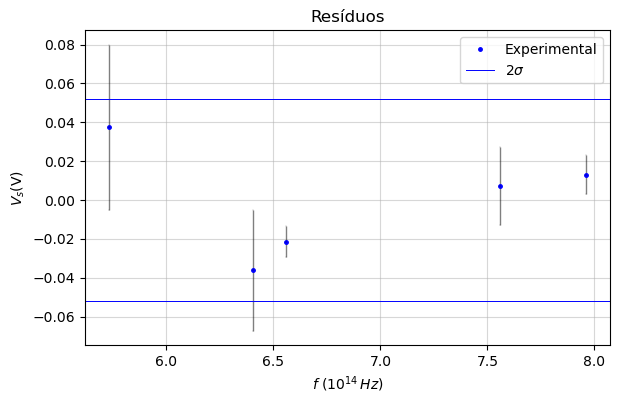

In [147]:
title="Resíduos"
residuos = data[1]-linear(data[0], *coefs)

fig, ax = makeplot([data[0], residuos], "Experimental", colors[0], [all_u_Vs[:-cut]*0.,all_u_Vs[:-cut] ], bars=True)

print( "Média dos resíduos:",np.average(residuos), "\t Resíduo máximo",np.max(np.abs(residuos)), "\t Desvio padrão:", np.std(residuos))

ax.axhline(2 * np.std(residuos), color=colors[0], linestyle='solid', linewidth=0.7,  label =r'$2 \sigma$')
ax.axhline(-2 * np.std(residuos), color=colors[0], linestyle='solid', linewidth=0.7)
plt.legend()
plt.title(title)
fig.savefig( "2" , dpi = 200 , facecolor = "w")


## Parte B

<div style="border:1px solid black;">
<span style="color:red; font-weight:bold;">Nota:</span> Vou optar por fazer a média dos 5 ensaios, considerando como erro o desvio padrão. No final retiro os LEDs 6 e 7 pq sensibilidade e posicionamento.

Data

In [151]:
data_all = np.genfromtxt("CSVs_T2/T2_B_all.csv", delimiter = ",", skip_header=1)
data = np.zeros([data_all.shape[0],2])
data[:,0] = data_all[:,0]
data[:,1] = np.mean(data_all[:,1:],axis =1)
data = np.transpose(data)
erros= np.zeros([data_all.shape[0],2])
erros[:,0] = data_all[:,0]*0  #maybe meter aqui as larguras dos espetros
erros[:,1] = np.std(data_all[:,1:],axis =1)#/np.sqrt(5)
erros = np.transpose(erros)

In [152]:
title           = "Método Condensador"
xlabel          = r"$f \,\, (10^{14} \, Hz)$"
ylabel          = "$V_s$ (V)"

##### Tudo

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Método Condensador')

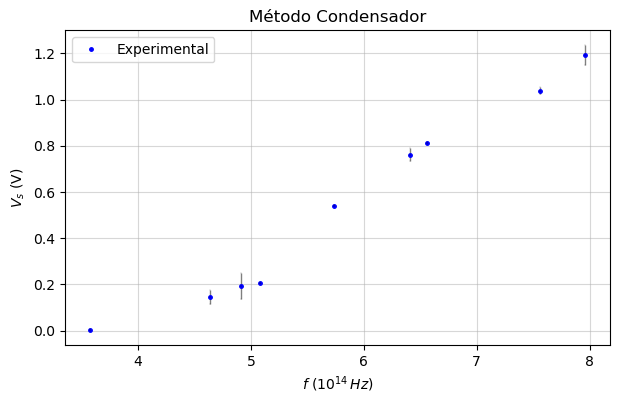

In [153]:
fig, ax = makeplot(data, "Experimental", colors[0], erros, bars= True)
plt.title(title)

m =  0.29571269736165023  +-  0.019698434760175486
b =  -1.17856113126905  +-  0.11774836276878664
r^2 =  0.969874311040021

 ----- Resultados Experimentais-----
C. de Planck em Js: 4.7e-34 	 +/-  3.2e-35
C. de Planck em Js: 4.7e-34 	 +/-  6.7 %
Erro percentual em relação ao teórico: 28.50487084363819 %


F. Trabalho (eV): 1.18 	 +/-  -0.12
F. Trabalho (eV): 1.18 	 +/-  -9.99 %
Erro percentual em relação ao teórico: 21.949593955692052 %


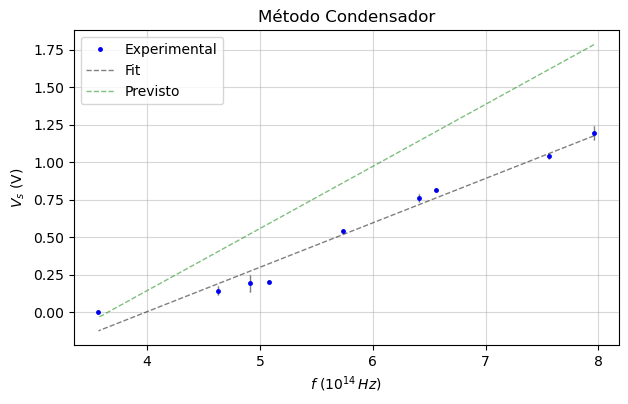

In [154]:
results = sps.linregress( data[0] , data[1]  )
m , b  = results.slope , results.intercept
um = results.stderr
ub = results.intercept_stderr
r2 = results.rvalue
coefs = np.array([ m , b])
print( "m = " , m , " +- " , um )
print( "b = " , b , " +- " , ub )
print( "r^2 = " , r2 ** 2   )
# h = declive * e
# declive em V / 10**14 Hz

h = m * e *10**-14
u_h = um/m * h
u_h_perc = u_h / h *100
erro_h = np.abs(h-H)/H *100

w = - b
u_w = w * np.abs(ub)/b
u_w_perc = u_w/ w *100
erro_w = np.abs(w-W)/W *100

print("\n ----- Resultados Experimentais-----")
print("C. de Planck em Js:", "{:.1e}".format(h), "\t +/- ", "{:.1e}".format(u_h))
print("C. de Planck em Js:", "{:.1e}".format(h), "\t +/- ", "{:.2}".format(u_h_perc), "%")
print("Erro percentual em relação ao teórico:", "{:2}".format(erro_h), "%")
print("\n")
print("F. Trabalho (eV):", "{:.3}".format(w), "\t +/- ", "{:.2}".format(u_w))
print("F. Trabalho (eV):", "{:.3}".format(w), "\t +/- ", "{:.3}".format(u_w_perc), "%")
print("Erro percentual em relação ao teórico:", "{:2}".format(erro_w), "%")

add_fit(ax, data[0], coefs, linear, label = "Fit", linestyle = "k--")
add_fit(ax, data[0], [H/e*10**14, -W], linear, label = "Previsto", linestyle = "g--")
fig

No handles with labels found to put in legend.


Média dos resíduos: 3.0839528461809905e-17 	 Resíduo máximo 0.12585651438532033 	 Desvio padrão: 0.07028263485899344


Text(0.5, 1.0, 'Resíduos')

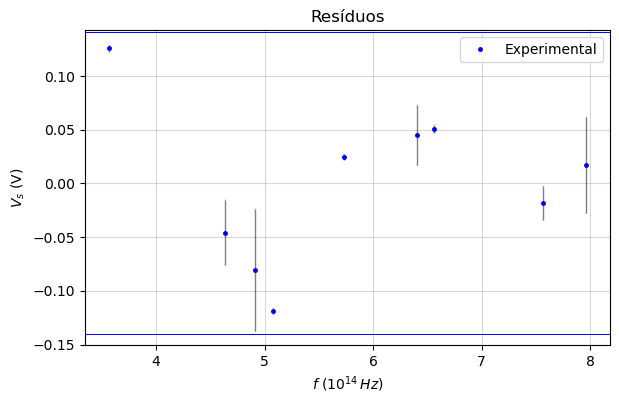

In [155]:
title="Resíduos"
residuos = data[1]-linear(data[0], *coefs)

fig, ax = makeplot([data[0], residuos], "Experimental", colors[0], erros, bars=True)

print( "Média dos resíduos:",np.average(residuos), "\t Resíduo máximo",np.max(np.abs(residuos)), "\t Desvio padrão:", np.std(residuos))

ax.axhline(2 * np.std(residuos), color=colors[0], linestyle='solid', linewidth=0.7,  label =r'$2 \sigma$')
ax.axhline(-2 * np.std(residuos), color=colors[0], linestyle='solid', linewidth=0.7)
plt.title(title)

##### Com pontos duvidosos

In [156]:
title = "Método do Condensador"
cut = 2
duvs_B = np.zeros([2, cut])
duvs_B[0] = data[0][len(data[0]) - cut:]
duvs_B[1] = data[1][len(data[0]) - cut:]
data_B = np.zeros([2, len(data[0]) - cut])
data_B[0] = data[0][:len(data[0]) - cut]
data_B[1] = data[1][:len(data[0]) - cut]
erros_B = np.zeros([2, data.shape[1] - cut])
erros_B[0] = erros[0][:len(data[0]) - cut]
erros_B[1] = erros[1][:len(data[0]) - cut]

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Método do Condensador')

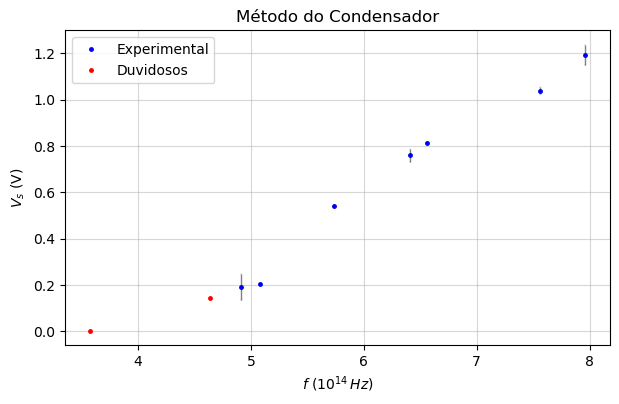

In [157]:
fig, ax = makeplot(data_B, "Experimental", colors[0], erros_B, bars= True)
add_points(duvs_B, "Duvidosos", "red", [fig,ax], bars = False)
plt.title(title)

In [158]:
print( 0.09 / 1.49 * 100 )

6.040268456375839


m =  0.328549398253467  +-  0.02026990647385885
b =  -1.3973564138265393  +-  0.12987813101996912
r^2 =  0.9813239705880787

 ----- Resultados Experimentais-----
C. de Planck em Js: 5.3e-34 	 +/-  3.2e-35
C. de Planck em Js: 5.3e-34 	 +/-  6.2 %
Erro percentual em relação ao teórico: 20.565867235490376 %


F. Trabalho (eV): 1.4 	 +/-  -0.13
F. Trabalho (eV): 1.4 	 +/-  -9.29 %
Erro percentual em relação ao teórico: 7.459840143937795 %


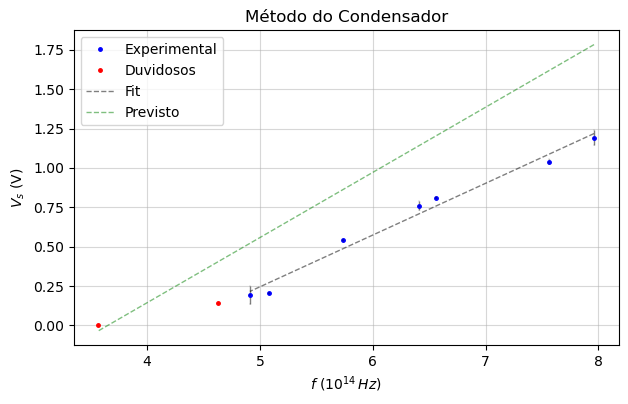

In [159]:
results = sps.linregress( data_B[0] , data_B[1]  )
m , b  = results.slope , results.intercept
um = results.stderr
ub = results.intercept_stderr
r2 = results.rvalue
coefs = np.array([ m , b])
print( "m = " , m , " +- " , um )
print( "b = " , b , " +- " , ub )
print( "r^2 = " , r2 ** 2   )
# h = declive * e
# declive em V / 10**14 Hz

h = m * e *10**-14
u_h = um/m * h
u_h_perc = u_h / h *100
erro_h = np.abs(h-H)/H *100

w = - b
u_w = w * np.abs(ub)/b
u_w_perc = u_w/ w *100
erro_w = np.abs(w-W)/W *100

print("\n ----- Resultados Experimentais-----")
print("C. de Planck em Js:", "{:.1e}".format(h), "\t +/- ", "{:.1e}".format(u_h))
print("C. de Planck em Js:", "{:.1e}".format(h), "\t +/- ", "{:.2}".format(u_h_perc), "%")
print("Erro percentual em relação ao teórico:", "{:2}".format(erro_h), "%")
print("\n")
print("F. Trabalho (eV):", "{:.3}".format(w), "\t +/- ", "{:.2}".format(u_w))
print("F. Trabalho (eV):", "{:.3}".format(w), "\t +/- ", "{:.3}".format(u_w_perc), "%")
print("Erro percentual em relação ao teórico:", "{:2}".format(erro_w), "%")

add_fit(ax, data_B[0], coefs, linear, label = "Fit", linestyle = "k--")
add_fit(ax, data[0], [H/e*10**14, -W], linear, label = "Previsto", linestyle = "g--")
fig.savefig( "1" , dpi = 200 , facecolor = "w")

fig

No handles with labels found to put in legend.


Média dos resíduos: -1.427429603089487e-16 	 Resíduo máximo 0.06700597990281948 	 Desvio padrão: 0.04896327498818539


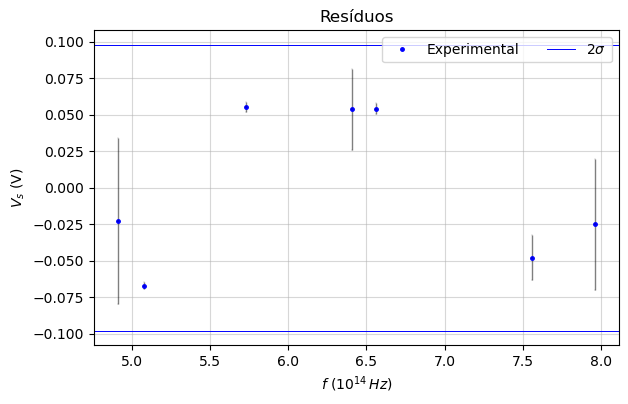

In [160]:
title="Resíduos"
residuos = data_B[1]-linear(data_B[0], *coefs)

fig, ax = makeplot([data_B[0], residuos], "Experimental", colors[0], erros_B, bars=True)

print( "Média dos resíduos:",np.average(residuos), "\t Resíduo máximo",np.max(np.abs(residuos)), "\t Desvio padrão:", np.std(residuos))

ax.axhline(2 * np.std(residuos), color=colors[0], linestyle='solid', linewidth=0.7,  label =r'$2 \sigma$')
ax.axhline(-2 * np.std(residuos), color=colors[0], linestyle='solid', linewidth=0.7)
plt.legend(ncol = 2)
plt.title(title)
fig.savefig( "2" , dpi = 200 , facecolor = "w")
